In [15]:
import numpy as np
import pandas as pd
import re 
import datetime
import string
import csv

In [141]:
datepattern = '%Y,%m,%d'
filepath = 'DailyTemps-Albany.txt'

In [142]:
with open(filepath, 'r') as f:
    file = f.read()

In [155]:
file = str(file).replace(',,',',-99999,')
file

'Albany Daily High, Avg, low + precip. Downloaded from Perrys site starting Jan 17 2006 (http://www.weatherunderground.com/history/airport/KALB/1938/6/17/MonthlyHistory.html#calendar)\nEDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity, Mean Humidity, Min Humidity, Max Sea Level PressureIn, Mean Sea Level PressureIn, Min Sea Level PressureIn, Max VisibilityMiles, Mean VisibilityMiles, Min VisibilityMiles, Max Wind SpeedMPH, Mean Wind SpeedMPH, Max Gust SpeedMPH,PrecipitationIn, CloudCover, Events\n1938,6,1,80,64,47,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,\n1938,6,2,79,64,49,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.20,-99999,\n1938,6,3,74,50,27,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.16,-99999,\n1938,6,4,77,63,49,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,\n1938,6,5,72,64,56,-99999,,-99999,,-99999,,-99999,,-9999

In [139]:
'''
data = []
for line in file.splitlines():
    lines = line.split(',')
    data.append(map(int, lines))
data = array(data)
'''

ValueError: invalid literal for int() with base 10: 'Albany Daily High'

In [ ]:
#data = re.findall()

In [156]:
lines = file.splitlines()

In [157]:
lines

['Albany Daily High, Avg, low + precip. Downloaded from Perrys site starting Jan 17 2006 (http://www.weatherunderground.com/history/airport/KALB/1938/6/17/MonthlyHistory.html#calendar)',
 'EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity, Mean Humidity, Min Humidity, Max Sea Level PressureIn, Mean Sea Level PressureIn, Min Sea Level PressureIn, Max VisibilityMiles, Mean VisibilityMiles, Min VisibilityMiles, Max Wind SpeedMPH, Mean Wind SpeedMPH, Max Gust SpeedMPH,PrecipitationIn, CloudCover, Events',
 '1938,6,1,80,64,47,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,',
 '1938,6,2,79,64,49,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.20,-99999,',
 '1938,6,3,74,50,27,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.16,-99999,',
 '1938,6,4,77,63,49,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,',
 '1938,6,5,72,64,56,-99999,,-99999,,-9

In [158]:
lines[6000:8000]

['1954,11,2,48,40,32,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.10,-99999,',
 '1954,11,3,47,41,35,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,1.63,-99999,',
 '1954,11,4,49,43,37,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.01,-99999,',
 '1954,11,5,48,41,34,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.01,-99999,',
 '1954,11,6,46,36,27,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,',
 '1954,11,7,48,36,23,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,',
 '1954,11,8,53,39,25,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,',
 '1954,11,9,44,36,29,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,',
 '1954,11,10,40,30,19,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,',
 '1954,11,11,51,38,25,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,,-99999,0.00,-99999,',
 '1954,1

In [62]:
il = lines[3].split('\n')
nl = il[0].split(',')
print nl
year = nl[0]
print year 

['1938', '6', '2', '79', '64', '49', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '0.20', '', '']
1938


In [159]:
data = []
for i,line in enumerate(lines[2:]):
    #data.append
    #split() whitespace will be used by default.
    il = line.split('\n')
    nl = il[0].split(',')
    #print nl
    year = nl[0]
    month = nl[1]
    day = nl[2]
    minn = nl[3]
    mean = nl[4]
    maxx = nl[5]
    
    total = year+','+month+','+day
    #year = int(il[0])
    date = datetime.datetime.strptime(total,datepattern)
    full = date, int(minn), int(mean), int(maxx)
    data.append((full))
    print  date, minn, mean, maxx

1938-06-01 00:00:00 80 64 47
1938-06-02 00:00:00 79 64 49
1938-06-03 00:00:00 74 50 27
1938-06-04 00:00:00 77 63 49
1938-06-05 00:00:00 72 64 56
1938-06-06 00:00:00 79 62 45
1938-06-07 00:00:00 89 76 63
1938-06-08 00:00:00 77 66 55
1938-06-09 00:00:00 72 60 47
1938-06-10 00:00:00 78 60 42
1938-06-11 00:00:00 77 68 60
1938-06-12 00:00:00 79 70 60
1938-06-13 00:00:00 74 65 56
1938-06-14 00:00:00 79 66 54
1938-06-15 00:00:00 84 68 51
1938-06-16 00:00:00 81 70 59
1938-06-17 00:00:00 82 70 59
1938-06-18 00:00:00 86 74 62
1938-06-19 00:00:00 79 70 61
1938-06-20 00:00:00 92 74 57
1938-06-21 00:00:00 97 78 58
1938-06-22 00:00:00 88 76 65
1938-06-23 00:00:00 91 80 68
1938-06-24 00:00:00 96 81 66
1938-06-25 00:00:00 92 80 69
1938-06-26 00:00:00 73 64 55
1938-06-27 00:00:00 61 57 53
1938-06-28 00:00:00 73 64 54
1938-06-29 00:00:00 77 62 48
1938-06-30 00:00:00 82 64 47
1938-07-01 00:00:00 73 66 59
1938-07-02 00:00:00 78 66 55
1938-07-03 00:00:00 71 60 49
1938-07-04 00:00:00 70 61 52
1938-07-05 00:

ValueError: invalid literal for int() with base 10: ''

In [160]:
data = np.array(data)
#print data

In [174]:
#int(' ')
print data

[[datetime.datetime(1938, 6, 1, 0, 0) 80 64 47]
 [datetime.datetime(1938, 6, 2, 0, 0) 79 64 49]
 [datetime.datetime(1938, 6, 3, 0, 0) 74 50 27]
 ..., 
 [datetime.datetime(2000, 8, 9, 0, 0) 88 78 69]
 [datetime.datetime(2000, 8, 10, 0, 0) 82 72 64]
 [datetime.datetime(2000, 8, 11, 0, 0) 79 70 62]]


In [83]:
import matplotlib.pyplot as plt


In [121]:
#selecting all of the rows but a specific column
print data[:,1]

[80 79 74 ..., 24 31 30]


In [161]:
data[data[:,1] < -100] = np.nan
data[data[:,2] < -100] = np.nan
data[data[:,3] < -100] = np.nan

In [79]:
%matplotlib inline


/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


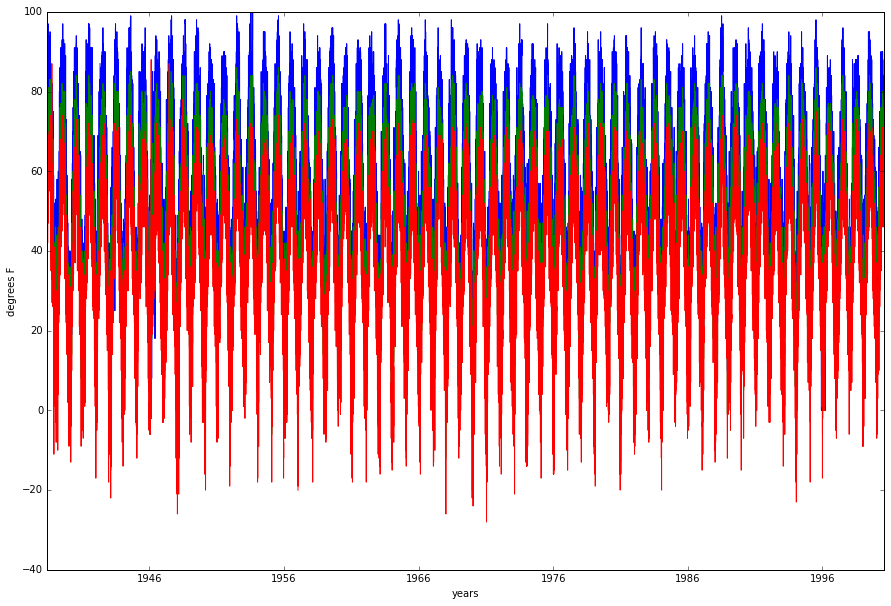

In [171]:
#plt.figsize(10,50)
plt.figure(figsize=(15,10))
plt.xlabel('years')
plt.ylabel('degrees F')

plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,2])
plt.plot(data[:,0],data[:,3])

ImportError: No module named plotly.graph_objs

In [201]:
import pandas as pd

#creating pandas dataframe from numpy array
df = pd.DataFrame({'Date': data[:,0], 'Max TemperatureF':data[:,1], 'Mean TemperatureF':data[:,2], 'Min TemperatureF':data[:,3]})


In [202]:
type(df['Date'][0])
#set the Date as the index
#df.plot.scatter(x='Date',y='Mean TemperatureF')
df = df.set_index(['Date'])
df

,Max TemperatureF,Mean TemperatureF,Min TemperatureF
Date,,,
1938-06-01,80,64,47
1938-06-02,79,64,49
1938-06-03,74,50,27
1938-06-04,77,63,49
1938-06-05,72,64,56
1938-06-06,79,62,45
1938-06-07,89,76,63
1938-06-08,77,66,55
1938-06-09,72,60,47


In [178]:

#df13 = df[df.Date]

In [195]:
df13 = df.loc['1997-01-01':'2000-01-01']
print(df13)


           Max TemperatureF Mean TemperatureF Min TemperatureF
Date                                                          
1997-01-01               19                 7               -5
1997-01-02               32                24               19
1997-01-03               46                40               33
1997-01-04               42                36               30
1997-01-05               50                43               36
1997-01-06               41                34               27
1997-01-07               30                26               21
1997-01-08               26                22               18
1997-01-09               23                18               14
1997-01-10               34                28               21
1997-01-11               25                21               17
1997-01-12               24                20               17
1997-01-13               26                24               21
1997-01-14               28                26          

In [203]:
df13.plot('Mean TemperatureF', kind='scatter')

ValueError: scatter requires and x and y column

KeyError: "['1997-01-01T00:00:00.000000000+0000' '1997-01-02T00:00:00.000000000+0000'\n '1997-01-03T00:00:00.000000000+0000' ...,\n '1999-12-30T00:00:00.000000000+0000' '1999-12-31T00:00:00.000000000+0000'\n '2000-01-01T00:00:00.000000000+0000'] not in index"

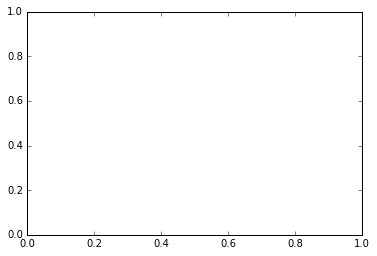

In [198]:
df13.plot.scatter(x=df13.index,y='Mean TemperatureF') #.reset_index()

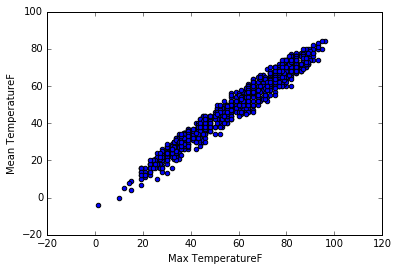

In [210]:
df14 = df13.reset_index()
#df14
df14.plot.scatter(x='Max TemperatureF',y='Mean TemperatureF') #.reset_index()